## Starter code for the k-means mini-project.

In [16]:
import pickle
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

In [17]:
def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()

In [18]:
### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

In [19]:
### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )

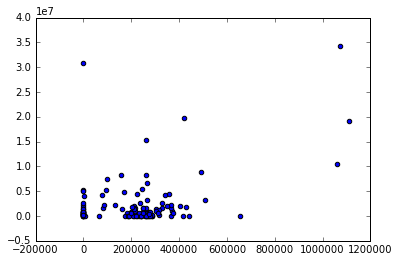

In [20]:
### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
%matplotlib inline
for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
plt.show()

In [21]:
### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2).fit(finance_features)
pred=kmeans.labels_

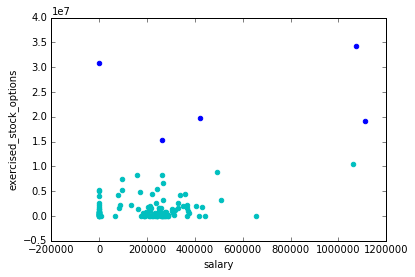

In [22]:
### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters2.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"

In [23]:
feature_3="total_payments"
target = "poi"
features_list = [target, feature_1, feature_2, feature_3]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )

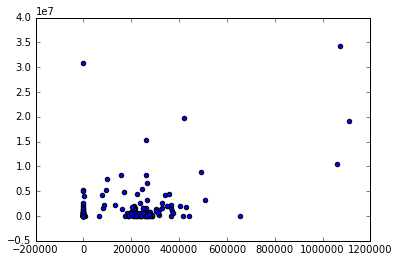

In [24]:
%matplotlib inline
for f1, f2, _ in finance_features:
    plt.scatter( f1, f2)
plt.show()

In [25]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2).fit(finance_features)
pred=kmeans.labels_

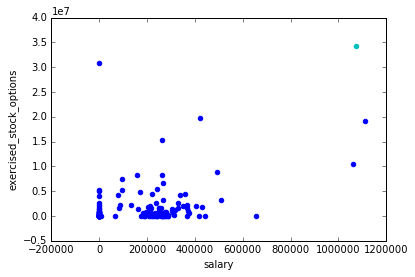

In [26]:
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters3.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"

# Feature  Scaling Lesson Mini Project

In [27]:
target = "poi"
features_list = [target, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )

In [31]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit_transform(finance_features)

array([[  0.00000000e+00,   3.29165684e-01,   0.00000000e+00],
       [  0.00000000e+00,   2.40360024e-01,   1.94493691e-01],
       [  0.00000000e+00,   1.53826564e-01,   1.42374791e-01],
       [  0.00000000e+00,   0.00000000e+00,   1.89776031e-02],
       [  1.00000000e+00,   2.18934757e-01,   1.61230322e-01],
       [  0.00000000e+00,   2.40351925e-01,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   1.43671679e-02],
       [  0.00000000e+00,   3.33359130e-01,   3.21428222e-02],
       [  0.00000000e+00,   0.00000000e+00,   1.51697646e-01],
       [  0.00000000e+00,   1.77358453e-01,   2.56282799e-02],
       [  0.00000000e+00,   1.17636049e-01,   6.64592547e-02],
       [  0.00000000e+00,   2.59695768e-01,   0.00000000e+00],
       [  0.00000000e+00,   2.23661832e-01,   2.22809026e-02],
       [  0.00000000e+00,   2.31706768e-01,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   6.45816409e-02],
       [  0.00000000e+00,   0.00000000e+00,   1.0836172

In [32]:
scaler.transform([[200000., 1000000.]])

ValueError: operands could not be broadcast together with shapes (1,2) (3,) (1,2) 

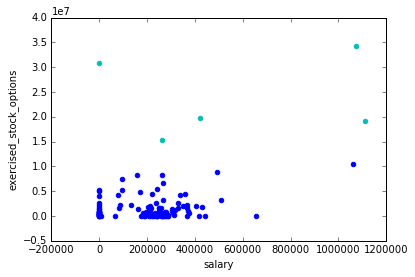

In [33]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2).fit(finance_features)
pred=kmeans.labels_

try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters_scaled.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"